In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import networkx as nx
import matplotlib.colors as mcolors
# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
import glob as glob
import math

#### Task 1: 
##### Merge adni data - specifically the 'AMYLOID_STATUS' and "CENTILOIDS" columns, maybe also 'TRACER' would be helpful to the tau SUVR csv UCBERKLEYAV1451_PVC_8mm_02_17_23_03Aug2023.csv
* Need to merge tau SUVR csv UCBERKLEYAV1451_PVC_8mm_02_17_23_03Aug2023.csv with amyloid csv UCBERKLEY_AMY_6MM_03Aug2023.csv which has amy and centiloid status on rid and visit number because I think each patient will have multiple visits? 

#### For ADNI data: 
* UCBERKLEY_AMY_6MM_03Aug2023.csv which has amy SUVR on rid and visit number because each patient has multiple visits 
* the PVC tau one also has multiple visits 
* For multiple visits, take the most recent?

In [85]:
adni_tau = pd.read_csv("./adni/UCBERKELEYAV1451_PVC_8mm_02_17_23_03Aug2023.csv")
adni_amy = pd.read_csv("./adni/UCBERKELEY_AMY_6MM_05Oct2023.csv")

#merge these on RID 



In [86]:
print(adni_tau.head(10))

   RID VISCODE VISCODE2    EXAMDATE  META_TEMPORAL_SUVR  META_TEMPORAL_VOLUME  \
0   21    init     m144  2018-02-02               1.609               54073.0   
1   31    init     m150  2018-04-24               1.576               55897.0   
2   31      y1     m162  2019-04-23               1.508               53519.0   
3   56    init     m144  2018-02-20               1.630               52891.0   
4   56      y1     m156  2019-01-10               1.584               53341.0   
5   56      y2     m168  2019-12-03               1.565               52625.0   
6   59    init     m144  2017-12-12               1.599               49946.0   
7   69    init     m144  2018-04-03               1.888               66055.0   
8   69      y1     m156  2019-01-23               1.862               65950.0   
9   69      y2     m168  2020-02-05               1.883               66520.0   

   CTX_ENTORHINAL_SUVR  CTX_ENTORHINAL_VOLUME  INFERIOR_CEREBGM_SUVR  \
0                1.767              

In [87]:
# #select last occurence of that RID to get most recent scan/centloid value 
# adni_amy_filtered = adni_amy.groupby('RID').tail(1)
# adni_amy_filtered = adni_amy_filtered.reset_index(drop=True)
# cols_to_keep = ['RID','SCANDATE','TRACER','CENTILOIDS']
# adni_amy_filtered = adni_amy_filtered[cols_to_keep]
# print(adni_amy_filtered)

In [88]:
#function to filter the latest visit of a df 
def filter_latest_visit(df):
    last_visit_df = df.groupby('RID').tail(1) #get the last occurance of that RID value 
    last_visit_df = last_visit_df.reset_index(drop=True)
    return last_visit_df
    

In [89]:
adni_amy_filtered = filter_latest_visit(adni_amy)
adni_tau_filtered = filter_latest_visit(adni_tau)

In [90]:
#filter cols for adni amy filtered 
cols_to_keep = ['RID','SCANDATE','TRACER','CENTILOIDS']
adni_amy_filtered = adni_amy_filtered[cols_to_keep]
print(adni_amy_filtered)

       RID    SCANDATE TRACER  CENTILOIDS
0       21  2017-11-28    FBP         2.0
1       23  2012-12-27    FBP        21.0
2       31  2018-04-18    FBP        97.0
3       35  2010-12-08    FBP        93.0
4       42  2013-01-23    FBP        -4.0
...    ...         ...    ...         ...
1734  7083  2022-09-13    FBB        13.0
1735  7089  2022-10-20    FBP         NaN
1736  7100  2022-09-28    FBB        50.0
1737  7105  2022-11-15    FBP       112.0
1738  7114  2022-11-23    FBB        13.0

[1739 rows x 4 columns]


In [91]:
print(adni_tau_filtered)

      RID VISCODE VISCODE2    EXAMDATE  META_TEMPORAL_SUVR  \
0      21    init     m144  2018-02-02               1.609   
1      31      y1     m162  2019-04-23               1.508   
2      56      y2     m168  2019-12-03               1.565   
3      59    init     m144  2017-12-12               1.599   
4      69      y2     m168  2020-02-05               1.883   
..    ...     ...      ...         ...                 ...   
926  7074      bl       bl  2022-07-26               1.541   
927  7079      bl       bl  2022-06-30               1.639   
928  7083      bl       bl  2022-08-16               1.756   
929  7088      bl       bl  2022-07-28               2.170   
930  7092      bl       bl  2022-07-12               1.387   

     META_TEMPORAL_VOLUME  CTX_ENTORHINAL_SUVR  CTX_ENTORHINAL_VOLUME  \
0                 54073.0                1.767                 2869.0   
1                 53519.0                2.388                 2508.0   
2                 52625.0           

In [92]:
#define function to make sure there are no nans 
def drop_rows_with_any_nan(df):
    """
    Drop rows with NaN values in any of the columns of a DataFrame.

    Args:
    df (pandas.DataFrame): The DataFrame to clean.

    Returns:
    pandas.DataFrame: The cleaned DataFrame with rows containing NaN values removed.
    """
    cleaned_df = df.dropna()
    return cleaned_df


In [93]:
adni_amy_filtered = drop_rows_with_any_nan(adni_amy_filtered)
adni_tau_filtered = drop_rows_with_any_nan(adni_tau_filtered)
print(adni_tau_filtered)

      RID VISCODE VISCODE2    EXAMDATE  META_TEMPORAL_SUVR  \
0      21    init     m144  2018-02-02               1.609   
1      31      y1     m162  2019-04-23               1.508   
2      56      y2     m168  2019-12-03               1.565   
3      59    init     m144  2017-12-12               1.599   
4      69      y2     m168  2020-02-05               1.883   
..    ...     ...      ...         ...                 ...   
926  7074      bl       bl  2022-07-26               1.541   
927  7079      bl       bl  2022-06-30               1.639   
928  7083      bl       bl  2022-08-16               1.756   
929  7088      bl       bl  2022-07-28               2.170   
930  7092      bl       bl  2022-07-12               1.387   

     META_TEMPORAL_VOLUME  CTX_ENTORHINAL_SUVR  CTX_ENTORHINAL_VOLUME  \
0                 54073.0                1.767                 2869.0   
1                 53519.0                2.388                 2508.0   
2                 52625.0           

In [94]:
#check for nan values to double check the code worked 
nan_cols = adni_tau_filtered.isna().any()
cols_with_nans = nan_cols[nan_cols].index.tolist()
print(cols_with_nans)

[]


In [95]:
#now merge the two dfs on RID only keeping rows where that RID is present in both data frames 
merged_adni_at = pd.merge(adni_amy_filtered,adni_tau_filtered, on="RID")
print(merged_adni_at)
#903 patients with both amy and tau pathology 



      RID    SCANDATE TRACER  CENTILOIDS VISCODE VISCODE2    EXAMDATE  \
0      21  2017-11-28    FBP         2.0    init     m144  2018-02-02   
1      31  2018-04-18    FBP        97.0      y1     m162  2019-04-23   
2      56  2019-12-04    FBP       -12.0      y2     m168  2019-12-03   
3      59  2019-12-20    FBP        -1.0    init     m144  2017-12-12   
4      69  2020-01-23    FBP        -2.0      y2     m168  2020-02-05   
..    ...         ...    ...         ...     ...      ...         ...   
898  6580  2022-10-13    FBB       142.0      y2      m24  2020-10-09   
899  6581  2022-12-07    FBB        28.0      bl       bl  2018-09-21   
900  6586  2022-10-25    FBB        40.0      y2      m24  2020-10-15   
901  6889  2022-10-26    FBB        -5.0      bl       bl  2020-10-16   
902  7083  2022-09-13    FBB        13.0      bl       bl  2022-08-16   

     META_TEMPORAL_SUVR  META_TEMPORAL_VOLUME  CTX_ENTORHINAL_SUVR  ...  \
0                 1.609               54073.0   

In [96]:
#now stratify using amyloid positivty to see how many are there (cut off of 21 based on royse paper)
merged_adni_at_amypos = merged_adni_at[merged_adni_at['CENTILOIDS']>= 21]
print(merged_adni_at_amypos)

      RID    SCANDATE TRACER  CENTILOIDS VISCODE VISCODE2    EXAMDATE  \
1      31  2018-04-18    FBP        97.0      y1     m162  2019-04-23   
7     112  2017-07-07    FBP        89.0      y1     m150  2018-08-13   
8     120  2017-09-26    FBP        32.0    init     m132  2017-09-13   
10    142  2015-02-04    FBP       107.0     v41     m120  2016-04-14   
13    210  2018-03-07    FBP        54.0    init     m138  2018-03-13   
..    ...         ...    ...         ...     ...      ...         ...   
896  6572  2022-10-26    FBB       115.0      y2      m24  2020-09-30   
897  6575  2022-11-30    FBB        89.0      y2      m24  2021-01-20   
898  6580  2022-10-13    FBB       142.0      y2      m24  2020-10-09   
899  6581  2022-12-07    FBB        28.0      bl       bl  2018-09-21   
900  6586  2022-10-25    FBB        40.0      y2      m24  2020-10-15   

     META_TEMPORAL_SUVR  META_TEMPORAL_VOLUME  CTX_ENTORHINAL_SUVR  ...  \
1                 1.508               53519.0   

In [97]:
merged_adni_at_amypos.to_csv("./adni/merged_adni_at_amy_pos.csv", index = False)

### sort the data into quartiles based on centiloid value

In [98]:
# Calculate quartiles for each patient's 'CENTILOIDS' values
merged_adni_at_amypos['QUARTILE'] = pd.qcut(merged_adni_at_amypos['CENTILOIDS'], q=4, labels=False)

# Initialize empty DataFrames for each quartile
quartile_dfs = [pd.DataFrame(columns=merged_adni_at_amypos.columns) for _ in range(4)]

# Sort patients into quartile DataFrames
for index, row in merged_adni_at_amypos.iterrows():
    quartile_num = row['QUARTILE']
    quartile_dfs[quartile_num] = quartile_dfs[quartile_num].append(row, ignore_index=True)

# Remove the 'QUARTILE' column from each quartile DataFrame
for i in range(4):
    quartile_dfs[i] = quartile_dfs[i].drop(columns=['QUARTILE'])




/tmp/ipykernel_697982/533944236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_adni_at_amypos['QUARTILE'] = pd.qcut(merged_adni_at_amypos['CENTILOIDS'], q=4, labels=False)
/tmp/ipykernel_697982/533944236.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quartile_dfs[quartile_num] = quartile_dfs[quartile_num].append(row, ignore_index=True)


#### further cleaning adni data (only bilateral (l/r hemi regions combined))
- has col names _VOLUME for the volume so drop these 
- they also have _SUVR so maybe could only keep these as a quality control check 
- the naming conventions are stuff like CTX_LH_SUPERIORFRONTAL_SUVR (there's a CTX_LH_SUPERIORFRONTAL_SUVR and CTX_RH_SUPERIORFRONTAL_SUVR for each) 
- looks like there's a CTX_SUPERIORFRONTAL_SUVR and then a CTX_LH_SUPERIORFRONTAL_SUVR and a CTX_RH_SUPERIORFRONTAL_SUVR
- so need to only keep the CTX_SUPERIORFRONTAL_SUVR ones (something like search start with CTX**) if only looking at bilateral brain regions (this correponds to the A4 naming convention "bi_* columns" )


### drop volume before doing anything else

In [99]:
#check how many l/r hemi combined or bilateral regions there are 
#check how many cols have bi_ prefix 
adni_bi_reg_count = sum(col.startswith('CTX_') for col in merged_adni_at_amypos.columns)
print(adni_bi_reg_count)
#how are there 156 bilateral/combined LR hemi regions for adni and then only 50 for a4 
#because the LR ones are CTX_LR etc so need to eclide 

156


##### create separate data frames based on the new quartiles

In [100]:
#divide into quartiles based on centiloids column 
#the thing is 903 total patients but I want to divide them into quartiles 

cent_low = quartile_dfs[0]
cent_med_low = quartile_dfs[1]
cent_med_high = quartile_dfs[2]
cent_high = quartile_dfs[3]


In [101]:
merged_adni_at_amypos[['CENTILOIDS','QUARTILE']]

,CENTILOIDS,QUARTILE
1,97.0,2
7,89.0,2
8,32.0,0
10,107.0,3
13,54.0,1
...,...,...
896,115.0,3
897,89.0,2
898,142.0,3
899,28.0,0


#### Quartiles seem reasonably well aligned with AD pathology 
- centiloids are scaled such that 0 is no pathology and 100 is advanced pathology, so plotting thr quartiles seem to be reasonably well aligned based on the histrogram plotted 
- classes are also numerically balanced

<AxesSubplot: >

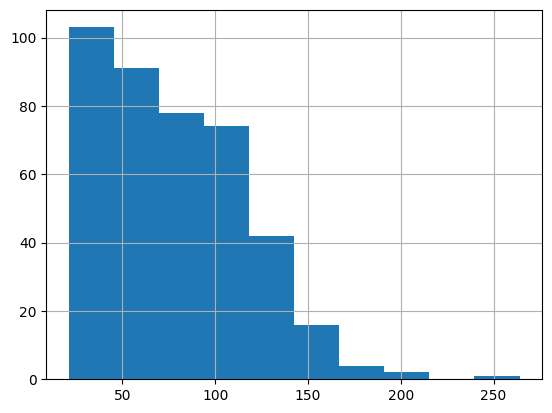

In [102]:
merged_adni_at_amypos['CENTILOIDS'].hist()

In [103]:
#classes are reasonably well balanced 
print(cent_low.shape)
print(cent_med_low.shape)
print(cent_med_high.shape)
print(cent_high.shape)


(103, 228)
(107, 228)
(100, 228)
(101, 228)


#### also check the centiloid ranges for each quartiles
##### it makes sense that the highest quartile would have the largest range because most of the data is cented 20-100 ish abased on the histogram 

In [104]:
low_range= [cent_low['CENTILOIDS'].min(),cent_low['CENTILOIDS'].max()]
med_low_range = [cent_med_low['CENTILOIDS'].min(),cent_med_low['CENTILOIDS'].max()]
med_high_range = [cent_med_high['CENTILOIDS'].min(),cent_med_high['CENTILOIDS'].max()]
high_range = [cent_high['CENTILOIDS'].min(),cent_high['CENTILOIDS'].max()]
print(f"centiloid range low amy pos quartile {low_range}")
print(f"centiloid range med low amy pos quartile {med_low_range}")
print(f"centiloid range med high amy pos quartile {med_high_range}")
print(f"centiloid range high amy pos quartile {high_range}")


centiloid range low amy pos quartile [21.0, 45.0]
centiloid range med low amy pos quartile [46.0, 75.0]
centiloid range med high amy pos quartile [76.0, 103.0]
centiloid range high amy pos quartile [104.0, 264.0]


##### save the adni centiloid quartiles csvs to use for graph construction

In [105]:
#save the quartile csvs 

cent_low.to_csv('./adni/adni_amy_tau_merged_cent_low_quartile.csv', index=False)
cent_med_low.to_csv('./adni/adni_amy_tau_merged_cent_med_low_quartile.csv', index=False)
cent_med_high.to_csv('./adni/adni_amy_tau_merged_cent_med_high_quartile.csv',index=False)
cent_high.to_csv('./adni/adni_amy_tau_merged_cent_high_quartile.csv',index=False)

- Only keep patients rows from most recent scan 


In [106]:
# #drop duplicate rows so that only the last visit row is still there 
# adni_amy_filtered = adni_amy.drop_duplicates(subset='RID',keep='last')
# #now it only has rows with the last visit 
# adni_amy_filtered = adni_amy.reset_index(drop=True)



# adni_amy['SCANDATE']= pd.to_datetime(adni_amy['SCANDATE'])
# #find most recent scan 
# most_recent_scan_date = adni_amy['SCANDATE'].max()
# #filter df to only include rows with most recent scan date 
# most_recent_scan = adni_amy[adni_amy['SCANDATE']==most_recent_scan_date]
# #select cols to keep 
# cols_to_keep = ['RID','SCANDATE','TRACER','CENTILOIDS']
# adni_amy_filtered = most_recent_scan[cols_to_keep]
# print(adni_amy_filtered)

In [107]:

print(adni_amy.head(10))

    LONIUID  RID  SITEID        PTID    SCANDATE PROCESSDATE IMAGE_RESOLUTION  \
0  I1594517   21      11  011-S-0021  2010-10-08  2022-09-06              6mm   
1  I1594530   21      11  011-S-0021  2012-10-03  2022-09-06              6mm   
2  I1594602   21      11  011-S-0021  2015-11-05  2022-09-06              6mm   
3  I1594546   21      11  011-S-0021  2017-11-28  2022-09-06              6mm   
4  I1594569   23      11  011-S-0023  2010-12-21  2022-09-06              6mm   
5  I1594566   23      11  011-S-0023  2012-12-27  2022-09-06              6mm   
6  I1596213   31      23  023-S-0031  2010-12-01  2022-09-06              6mm   
7  I1596225   31      23  023-S-0031  2012-09-20  2022-09-06              6mm   
8  I1596160   31      23  023-S-0031  2016-01-26  2023-04-13              6mm   
9  I1596222   31      23  023-S-0031  2018-04-18  2022-09-06              6mm   

   qc_flag TRACER  AMYLOID_STATUS  ...  RIGHT_PALLIDUM_VOLUME  \
0        2    FBP             0.0  ...     

* Task 1: 
* clean A4 data 
* I think that the A4_processed.csv has both amyloid and tau, but also includes patients with amyloid and no tau so just drop rows where the tau col is empty 
* A4_PETSUVR_PRV2_15_Aug2023 has id, visit code, and composite centiloid so use this for centiloid 

* TAUSUVR_15Aug2023 has the regional survs 


In [108]:
a4_amy = pd.read_csv("./a4/A4_PETSUVR_PRV2_15Aug2023.csv")
a4_tau_suvr = pd.read_csv("./a4/TAUSUVR_15Aug2023.csv")
print(a4_amy) #has overall amyloid score 

             BID  VISCODE protocol  scan_number visit_code       ligand  \
0      B10021023        3       A4            1       SCV2  Florbetapir   
1      B10021023        3       A4            1       SCV2  Florbetapir   
2      B10021023        3       A4            1       SCV2  Florbetapir   
3      B10021023        3       A4            1       SCV2  Florbetapir   
4      B10021023        3       A4            1       SCV2  Florbetapir   
...          ...      ...      ...          ...        ...          ...   
35931  B99987993        3       A4            1       SCV2  Florbetapir   
35932  B99987993        3       A4            1       SCV2  Florbetapir   
35933  B99987993        3       A4            1       SCV2  Florbetapir   
35934  B99987993        3       A4            1       SCV2  Florbetapir   
35935  B99987993        3       A4            1       SCV2  Florbetapir   

      scan_analyzed  other_specify             brain_region  suvr_cer  \
0               Yes       

In [109]:
print(a4_tau_suvr) #tau region specific SUVRS

            ID  Mean_3rd_Ventricle  Mean_4th_Ventricle  Mean_Brain_Stem  \
0    B10423472            0.845577            0.864285         0.911925   
1    B10662415            0.758578            0.790144         0.827216   
2    B10693248            1.110908            0.963089         1.000662   
3    B10709603            1.041388            0.869095         1.007361   
4    B10795731            0.864528            0.885948         1.070901   
..         ...                 ...                 ...              ...   
442  B99525373            0.926468            0.933808         0.911147   
443  B99649691            0.889383            0.920347         0.951339   
444  B99696480            0.977545            0.815751         0.914736   
445  B99860801            0.842499            0.860196         0.924592   
446  B99870985            0.912576            0.822100         1.025361   

     Mean_CC_Anterior  Mean_CC_Central  Mean_CC_Mid_Anterior  \
0            0.857168         0.733

##### IDs for A4 have the format B********* and are in a col named ['BID']

In [110]:
# #check to make sure that there is only one centiloid per patient 
# a4_amy_nonan = a4_amy.dropna(subset=['centiloid']) #filter out rows where centiloid is not nan 
# #group filtered df by bid and count number of non nan centiloid values for each bid 
# bid_counts = a4_amy_nonan.groupby('BID')['centiloid'].count()
# bids_with_muliple_cent = bid_counts[bid_counts>1].index
# print(bids_with_muliple_cent) #Index([], dtype='object', name='BID') means that each unique BID only has one centilold value


###### Structure of a4 amy csv:
- multiple rows for same BID, filter it by which has a non nan value in 'centiloid' col 
- 

In [111]:
a4_amy_nonan = a4_amy.dropna(subset=['centiloid'])
print(a4_amy_nonan['scan_number'].unique()) #make sure they only have 1 scan

[1]


In [112]:
#only keep amy cols we wnat 
a4_cols_to_keep = ['BID','update_stamp','ligand','centiloid']
a4_amy_filtered = a4_amy_nonan[a4_cols_to_keep]
print(a4_amy_filtered)

             BID           update_stamp       ligand  centiloid
1      B10021023  2018-12-06 00:00:00.0  Florbetapir     9.4714
9      B10081264  2018-12-06 00:00:00.0  Florbetapir    36.9319
17     B10102783  2018-12-06 00:00:00.0  Florbetapir   108.3290
25     B10106934  2018-12-06 00:00:00.0  Florbetapir    11.3021
33     B10108368  2018-12-06 00:00:00.0  Florbetapir    58.9003
...          ...                    ...          ...        ...
35897  B99702303  2019-04-19 00:00:00.0  Florbetapir    11.3021
35905  B99742660  2019-04-19 00:00:00.0  Florbetapir    -5.1742
35913  B99822982  2019-04-19 00:00:00.0  Florbetapir     5.8100
35921  B99860801  2019-04-19 00:00:00.0  Florbetapir    35.1012
35929  B99987993  2019-04-19 00:00:00.0  Florbetapir     9.4714

[4492 rows x 4 columns]


In [113]:
#the tau csv has 'ID' instead of BID so rename it before merging 
a4_tau_suvr.rename(columns={'ID':'BID'},inplace=True)
print(a4_tau_suvr)

           BID  Mean_3rd_Ventricle  Mean_4th_Ventricle  Mean_Brain_Stem  \
0    B10423472            0.845577            0.864285         0.911925   
1    B10662415            0.758578            0.790144         0.827216   
2    B10693248            1.110908            0.963089         1.000662   
3    B10709603            1.041388            0.869095         1.007361   
4    B10795731            0.864528            0.885948         1.070901   
..         ...                 ...                 ...              ...   
442  B99525373            0.926468            0.933808         0.911147   
443  B99649691            0.889383            0.920347         0.951339   
444  B99696480            0.977545            0.815751         0.914736   
445  B99860801            0.842499            0.860196         0.924592   
446  B99870985            0.912576            0.822100         1.025361   

     Mean_CC_Anterior  Mean_CC_Central  Mean_CC_Mid_Anterior  \
0            0.857168         0.733

In [114]:
print(a4_amy_nonan['BID'].nunique()) #check that each BID is a unique value now (should be 4492), it's good 
#check that each ID in tau suvr is unqiue (no duplicate scans) number should be 447 rows
print(a4_tau_suvr['BID'].nunique()) #it's gppd 

4492
447


#### merge the tau suvr with centiloid col 

In [115]:
merged_a4_at = pd.merge(a4_amy_filtered,a4_tau_suvr,on='BID')
print(merged_a4_at) #447 patients 

           BID         update_stamp_x       ligand  centiloid  \
0    B10423472  2018-12-06 00:00:00.0  Florbetapir    80.8687   
1    B10662415  2018-12-06 00:00:00.0  Florbetapir    -5.1742   
2    B10693248  2018-12-06 00:00:00.0  Florbetapir   113.8210   
3    B10709603  2018-12-06 00:00:00.0  Florbetapir    40.5933   
4    B10904689  2018-12-06 00:00:00.0  Florbetapir   126.6360   
..         ...                    ...          ...        ...   
442  B92372599  2019-04-19 00:00:00.0  Florbetapir    40.5933   
443  B97841288  2019-04-19 00:00:00.0  Florbetapir    71.7152   
444  B98032541  2019-04-19 00:00:00.0  Florbetapir    55.2389   
445  B99033399  2019-04-19 00:00:00.0  Florbetapir    53.4082   
446  B99860801  2019-04-19 00:00:00.0  Florbetapir    35.1012   

     Mean_3rd_Ventricle  Mean_4th_Ventricle  Mean_Brain_Stem  \
0              0.845577            0.864285         0.911925   
1              0.758578            0.790144         0.827216   
2              1.110908    

#### sratify into amy pos 


##### stratify a4 into quartiles 

In [116]:
#now stratify using amyloid positivty to see how many are there (cut off of 21 based on royse paper)
merged_a4_at_amypos = merged_a4_at[merged_a4_at['centiloid']>= 21]
# print(merged_a4_at_amypos)

In [117]:
merged_a4_at_amypos.to_csv("./a4/merged_a4_at_amy_pos.csv", index = False)

#### Further cleaning: 
##### The a4 data has columns with Volume_ prefix so need to drop those 
- there's also a mean unknown col need to see if that's also present in the adni one 
- also with left right from stanford coumentation "We additionally created bilateral regions taking a volume weighted average across hemispheres. These are provided for in the bi_* columns" so maybe just use these
- need to drop stuff like Mean_non_WM_hypointensities

In [118]:
#check how many cols have bi_ prefix 
bi_reg_count = sum(col.startswith('bi_') for col in merged_a4_at_amypos.columns)
print(bi_reg_count)
#50 bilateral regions 

50


In [119]:
# Calculate quartiles for each patient's 'CENTILOIDS' values
merged_a4_at_amypos['quartile'] = pd.qcut(merged_a4_at_amypos['centiloid'], q=4, labels=False)

# Initialize empty DataFrames for each quartile
quartile_dfs = [pd.DataFrame(columns=merged_a4_at_amypos.columns) for _ in range(4)]

# Sort patients into quartile DataFrames
for index, row in merged_a4_at_amypos.iterrows():
    quartile_num = row['quartile']
    quartile_dfs[quartile_num] = quartile_dfs[quartile_num].append(row, ignore_index=True)

# Remove the 'QUARTILE' column from each quartile DataFrame
for i in range(4):
    quartile_dfs[i] = quartile_dfs[i].drop(columns=['quartile'])


/tmp/ipykernel_697982/451221244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_a4_at_amypos['quartile'] = pd.qcut(merged_a4_at_amypos['centiloid'], q=4, labels=False)
/tmp/ipykernel_697982/451221244.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  quartile_dfs[quartile_num] = quartile_dfs[quartile_num].append(row, ignore_index=True)


<AxesSubplot: >

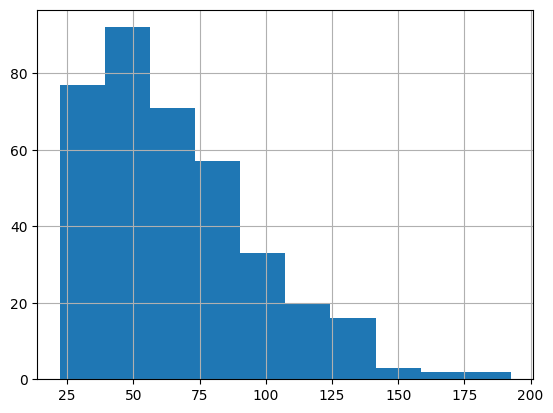

In [120]:
merged_a4_at_amypos['centiloid'].hist()

In [121]:
a4_cent_low = quartile_dfs[0]
a4_cent_med_low = quartile_dfs[1]
a4_cent_med_high = quartile_dfs[2]
a4_cent_high = quartile_dfs[3]

In [122]:
#classes are reasonably well balanced 
print(a4_cent_low.shape)
print(a4_cent_med_low.shape)
print(a4_cent_med_high.shape)
print(a4_cent_high.shape)

(101, 277)
(86, 277)
(94, 277)
(92, 277)


In [123]:
a4_low_range= [a4_cent_low['centiloid'].min(),a4_cent_low['centiloid'].max()]
a4_med_low_range = [a4_cent_med_low['centiloid'].min(),a4_cent_med_low['centiloid'].max()]
a4_med_high_range = [a4_cent_med_high['centiloid'].min(),a4_cent_med_high['centiloid'].max()]
a4_high_range = [a4_cent_high['centiloid'].min(),a4_cent_high['centiloid'].max()]
print(f"centiloid range low amy pos quartile {a4_low_range}")
print(f"centiloid range med low amy pos quartile {a4_med_low_range}")
print(f"centiloid range med high amy pos quartile {a4_med_high_range}")
print(f"centiloid range high amy pos quartile {a4_high_range}")

centiloid range low amy pos quartile [22.2863, 42.424]
centiloid range med low amy pos quartile [44.2547, 60.731]
centiloid range med high amy pos quartile [62.5617, 82.6994]
centiloid range high amy pos quartile [84.5301, 192.541]


##### save a4 quartiles for graph construction 


In [124]:
#save the quartile csvs 

a4_cent_low.to_csv('./a4/a4_amy_tau_merged_cent_low_quartile.csv',index=False)
a4_cent_med_low.to_csv('./a4/a4_amy_tau_merged_cent_med_low_quartile.csv',index=False)
a4_cent_med_high.to_csv('./a4/a4_amy_tau_merged_cent_med_high_quartile.csv',index=False)
a4_cent_high.to_csv('./a4/a4_adni_amy_tau_merged_cent_high_quartile.csv',index=False)